### Exploring Weather Trends

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load the data from the excel file
weather = pd.read_excel('/content/london_weather.xlsx')

# Fill the missing values with mean data
weather_clean = weather.fillna(weather.mean())

# Adjust the data format to date format
weather_clean['date'] = pd.to_datetime(weather_clean['date'], format='%Y%m%d')

### Lesson 5 - Weather Forecast Model

In [17]:
from sklearn.linear_model import LinearRegression

# Setting the 'date' column as the Index
weather_clean.set_index('date', inplace=True)

# Create time-based features
weather_clean['day_of_year'] = weather_clean.index.dayofyear
weather_clean['year'] = weather_clean.index.year

# Preparing the data for training - setting up X and Y variables
X = weather_clean[['day_of_year', 'year']]
y = weather_clean['mean_temp']

# Spilt the data into training and test sets
train_size = int(len(X)*0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [19]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Forecast for the next 90 days
future_days = 90
last_date = weather_clean.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range (1, future_days +1)]
future_day_of_year = [date.timetuple().tm_yday for date in future_dates]
future_year = [date.year for date in future_dates]

X_future = pd.DataFrame({'day_of_year': future_day_of_year, 'year': future_year})
forecast = model.predict(X_future)

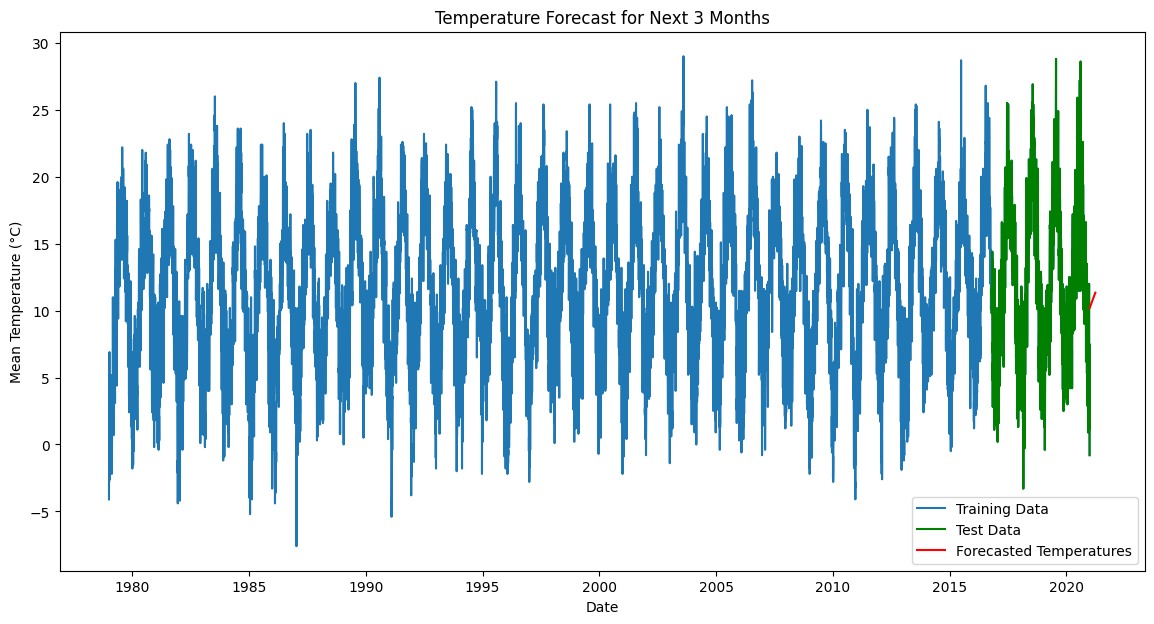

In [21]:
# Plotting the maximum and minimum temperatures in London
plt.figure(figsize=(14, 7)) # Set up figure size
#Plot training data
plt.plot(weather_clean.index, weather_clean['mean_temp'], label='Training Data')
# Plot test data
plt.plot(X_test.index, y_test, label='Test Data', color = 'green')
# Plot forecast data
plt.plot(future_dates, forecast, label='Forecasted Temperatures', color = 'red')

# Add chart title and labels
plt.title('Temperature Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')

# Add legend
plt.legend()

# Display the chart
plt.show()